# Análise explanatória 

*** Objetivos: ***

* Entender o que é e como aplicar um workflow 
* Entender o modelo, entender o conceito de métricas aplicar avaliação de regras de negócio.
* Aplicar análise explanatoria, técnicas de estatística, queryes e afins.
* Entendimento de modelos.
* Data handling.
* Modelo de dados (tratamento de data missing, outliers)
* Criação de apresentação de dados com jupyter


## Workflow - Engenharia de Software  

Para que haja um entendimento completo e um projeto organizado orienta-se seguir algum método de engenharia de software definindo um workflow, existens alguns workflows famosos ultilizados no mercado como por exemplo [Crisp-dm](https://www.kdnuggets.com/2014/10/crisp-dm-top-methodology-analytics-data-mining-data-science-projects.html) e o [Microsoft Workflow for Data Science](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle-business-understanding) ambos os modelos são totalmente aplicáveis e ultilizados para o trabalho de um cientista de dados, tais técnicas são fundamentais para o trabalho em grupo. 
Nesse artigo ultilizaremos o Microsoft Workflow, que se baseia nos seguintes passos:

+ Business Understanding
+ Data Acquisition and Understanding
+ Modeling
+ Deployment
+ Customer Acceptance

![image.png](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/media/overview/tdsp-lifecycle2.png)

Fonte [Microsoft Data Science](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle-business-understanding)

*** 1 - Busness understanding ***

A parte de entendimento do negócio se baseia no entendimento do modelo, métricas e variáveis. Nessa fase estuda-se o modelo, define o problema a ser resolvido e as métricas ultilizadas para que seu resultado seja válido e impactante no negócio.


*** 2 Data acquisition and understanding *** 

Na aquisição dos dados o objetivo é agrupar os dados e desenvolver seu dataset tendo em vista a criação de um dataset limpo e de qualidade, essa parte do projeto é a mais trabalhosa principalmente pela função da limpagem dos dados, em casos onde o profissional trabalha com dados não estruturados essa parte do projeto pode levar até meses. 

Na fase de aquisição dos dados também é necessária a definição da arquitetura ultilizada no projeto, precisa-se ultilizar uma visão analítica e avaliar seu dataset e assim definir quantas pipelines você irá ultilizar, se o projeto ultilizara um cluster x ou y, se necessitara de uma arquitetura de clusterização como handop e etc. 

*** 3 Modeling *** 

Aqui na modelagem você deve determinar qual modelo de machine learning ou modelo estatístico ultilizado.
Uma das partes mais importantes nesse estágio é a separação do seu dataset em treino e teste, geralmente existem abordagens como 60-40 onde voce faz uma divisão em seu dataset com 60% treino e 40% teste até técnicas mais trabalhadas como walking forward algorithm que se encarrega de efetuar inúmeras divisões em seu modelo para facilitar a validação futura.

Nsse passo específico você pode seguir a seguinte abordagem

* *** Divida seu dataset *** como por exemplo uma divisão 60 - 40
* *** Treine inúmeros modelos *** Treine vários modelos de dados, teste inúmeros algorítmos.
* *** Teste  e valide os modelos *** Execute os testes com todos os modelos treinados, ultilize tecnicas como cross validation e A/B testing
* *** Determine a "melhor" solução ***  Escolha o algorítmo que representa os melhores resultados nos testes, os melhores modelos irão para produção. No estágio de produção monitore constantemente seus resultados, retire as métricas e avalie elas calmamente.

*** 4 Deployment *** 

No passo de desenvolvimento você vai montar o projeto para o usuario final, tenha criatividade e ultlize o melhor das técnicas de vizualização como:

+ Online websites
+ Spreadsheets
+ Dashboards
+ Line-of-business applications
+ Back-end applications

*** 5 Customer acceptance *** 

Agora você ja está terminando o projeto revise seu modelo, reveja todos os detalhes e principalmente *** garanta que você está entregando o que seu cliente realmente quer ***  e receba o feedback. Caso necessário reveja os passos anteriores.




#  Workflow, análise explanatória Medical Cost Personal Datasets

Para demostração ultiliza-se o [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)  esse dataset é abordado no livro [Machine Learning with R by Brett Lantz](https://www.amazon.com.br/Machine-Learning-R-Brett-Lantz/dp/1782162143) e tais dados são de domínio publico, esse dataset e outros do livro se encontram pada download [aqui](https://github.com/stedy/Machine-Learning-with-R-datasets).

*** 1 - Busness understanding ***

Com esse dataset são possíveis inúmeras análises estatísticas e permite uma análise explanatória ideal, também pode ser ultilizada com machine learning para predição de custo, regressões lineares e afins.

Colunas 
- age: Idade do beneficiário.

- sex: Gênero explicito como: female, male.

- bmi: Do inglês Body mass index, o índice de massa corporal, é calculado como:  (peso(kg) / altura(m) ^ 2) e os valores ideais estão entre,  18.5 a 24.9.

- children: Número de crianças cobertas pelo plano de saúde.

- smoker: Fumante ou não.

- region: Região dos EUA onde o beneficiário vive, northeast, southeast, southwest, northwest.

- charges: Custo pago pelo plano de  saúde.

Entendimento do modelo:

*** Questionar sobre ***  
+ "O que posso extrair com esses dados?"
+ "O quais dados posso cruzar?"
+ "Quão importante é essa pesquisa?"
+ "Quão impactante é essa pesquisa?"

*** 2 Data acquisition and understanding ***

*** 1 - Limpeza dos dados - tratando missing data ***
No dataset foram inseridos alguns campos Nan e campos com valores em branco o primeiro passo após o download do dataset e carregar os dados  é remover tais campos pois eles contém informações inválidas. No nosso caso faremos o descarte total das linhas.

*** Obs 2: *** A partir de agora ultilizaremos o python. Considerando que você ja tenha lido a [aula 1](https://github.com/araramakerspace/CursoDataScience/blob/master/Aula1-pandas%2Bmatplot/aula1.ipynb)


*** Obs 2: *** O pandas dedicou uma pagina exclusiva para tratamento de data missing [aqui](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

Primeiro executamos o metodo head() do pandas para mostrar os primeiros elementos em seguida o método isna() que verifica as dataMissing e retornam verdadeiro ou falso





In [2]:
import pandas as pd #biblioteca para manupular os dataframes
import matplotlib.pyplot as plt #biblioteca para gráficos
import seaborn as sns  #biblioteca para gráficos
import numpy as np #biblioteca algebra linear

#habilita iteração com os gráficos
%matplotlib notebook

# %matplotlib inline

df = pd.read_csv("insurance.csv")

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.9,0,yes,NaN,16884.92400
1,19.0,female,27.9,0,yes,southwest,16884.92400
2,18.0,male,33.77,1,no,southeast,1725.55230
3,NaN,male,33.77,1,no,southeast,1725.55230
4,28.0,male,33,3,no,southeast,4449.46200
5,28.0,male,33,3,no,NaN,4449.46200
6,33.0,male,22.705,0,no,northwest,21984.47061
7,32.0,male,28.88,0,no,northwest,3866.85520
8,32.0,male,NaN,0,no,NaN,3866.85520
9,31.0,female,25.74,0,no,southeast,3756.62160


In [3]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,True,False,False,True,False
9,False,False,False,False,False,False,False


*** Executamos o comando shape para verificar quantas linhas temos antes da remoção  *** 

In [18]:
df.shape #verificar  o numero de linhas e colunas

(1339, 7)

*** Para remover as datas missing ultiliza-se o comando df.dropna() para apagar as linhas NaN*** 

Outros argumentos para dropna()
* df.dropna()     #apaga as linhas que possuem Nan
* df.dropna(how='all')     #apaga somente as colunas em que todos os valores são NaN
* df.dropna(thresh=2)   #Apaga coluna somente se houverem duas ocorrencias de NaN
* df.dropna(subset=[1])   #Apagar somente uma coluna em específico


In [16]:
df = df.dropna()

In [ ]:
*** Executamos novamente shape paar *** 

In [19]:
df.shape

(1339, 7)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


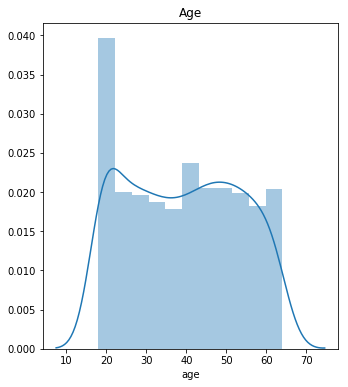

In [15]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.distplot(df['age']).set_title("Age")
#plt.subplot(132)
#sns.distplot(df['bmi']).set_title("Bmi")
#plt.subplot(133)
#sns.distplot(df['charges']).set_title("Charges")
plt.show()





guia (---(coisa gabs) --- IGNORAR O ESCRITO NESSE BLOCO [RASCUNHO])
- Discuções e entendimento de modelos de negócio 
- Análises explanatórias e estatística.
- Entendimento de modelos
- Data handling 
- Modelo de dados (tratamento de data missing, outliers)
- Modelos estatísticos
- Criação de apresentação de dados com jupyter

dataset da aula [gastos medicos](https://www.kaggle.com/mirichoi0218/insurance)


leitura adicional (análise estatística, estatística aplicada):
https://www.kaggle.com/janiobachmann/statistical-analysis-a-frequentist-approach


ordem
*** uns 3 slides de teoria, seguir a análise explanatoria seguindo o workflow da microsoft (claro reduzido) *** 
- Microsoft Workflow para data Science -> explicar como funciona o metodo do workflow (engenharia de software) ver [aqui] (https://docs.microsoft.com/enus/azure/machine-learning/team-data-science-process/overview)
                                                                                      
- Discuções e entendimento de modelos de negócio Falar de como aplicar as metricas, dos desafios de escolher as melhores metricas no nosso exemplo ficara bem claro

- analise explanatoria completa

Realizar uma analise explanatoria completa explicanto todos os conceitos em paralelo, 







